## Churning in Telecommunication Industry

Churning has been a well-known issue within companies in the telecommunication industry. Many factors have contributed to this issue.

First and foremost, what is churning? According to [Investopedia](https://www.investopedia.com/terms/c/churnrate.asp), churning is defined as the rate at which customers <b><u>stop</u></b> doing business with an entity.

Some possible issue leading to churning:
- <b>Customer experience</b> -> customer may feel dissatisfied by customer service they receive.
- <b>Customer expectation</b> -> customer who trust in the company has a certain level of expectation.
- <b>Competitors</b> -> arising competitors might offer similar product with lower price.

As a result, churning will impact companies not only financially, but also reputation wise.

For companies, having the ability to predict consumer churning will help them forecast future revenue more accurately.

Through this arising issue, many have tried to figure out how to minimize churn rate and also predict which customer could potentially churn in the future based on customer information.

Keeping this issue in mind, I am inspired to create a machine learning model that can help understand user patterns that led to churn. 

I will try to identify churning rate factors for one of telecommunication company in United States. The dataset I'm going to use is provided by [Kaggle](https://www.kaggle.com/mnassrib/telecom-churn-datasets), which has features such as charges, customer's living area and number of calls they made throughout the month. 

By the end of this project, the <b>objective</b> hoped to be achieved are:
- Able to determine the most important factor impacting churn.
- Predict whether customer will churn in the future, given their monthly usage pattern.
- Give recommendation.

### Import package for cleaning and visualizing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Load Dataset (Training and Testing)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Combine test and train dataset

To visualize and analyze data, full training set (train + test) will be used. <br>
Goal: To gather better information and get more data sample

In [3]:
full = pd.concat([train,test],ignore_index=True)

### Check null value

In [4]:
full.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### View column names in dataset

To see if there is any columns that need to be renamed --> make it easier to call that column

In [6]:
full.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

### Rename column

In [7]:
columns = ['State','Account_length','Area_code','Intl_plan','Voicemail_plan','Voicemail_message','day_minute','day_call','day_charge','eve_minute','eve_call','eve_charge','night_minute','night_call','night_charge','intl_minute','intl_call','intl_charge','CS_calls','Churn']
train.columns = columns
test.columns = columns
full.columns = columns

### View head and tail of full dataset

In [8]:
full.head()

,State,Account_length,Area_code,Intl_plan,Voicemail_plan,Voicemail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,CS_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
full.tail()

,State,Account_length,Area_code,Intl_plan,Voicemail_plan,Voicemail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,CS_calls,Churn
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3332,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Rename target variable to numerical

In [10]:
train['Churn'] = train['Churn'].replace({False:0,True:1})
test['Churn'] = test['Churn'].replace({False:0,True:1})
full['Churn'] = full['Churn'].replace({False:0,True:1})

### View distribution of target variable

Goal: To see if the data is balanced (target 1 and target 0 has balance proportion)

In [32]:
churn = full['Churn'].value_counts()
churn

0    2850
1     483
Name: Churn, dtype: int64

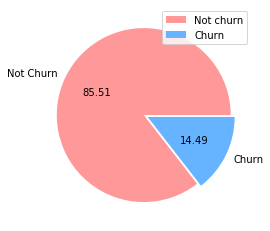

In [33]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ECFF33']
plt.pie(churn.values,labels=['Not Churn','Churn'],colors=colors,autopct='%.2f',explode=[0,0.05])
plt.legend(['Not churn','Churn'])
plt.show()

### Check categorical data

In [34]:
full['Area_code'].value_counts()

415    1655
510     840
408     838
Name: Area_code, dtype: int64

In [35]:
full['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
CO     66
WA     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [36]:
full['Intl_plan'].value_counts()

No     3010
Yes     323
Name: Intl_plan, dtype: int64

In [37]:
full['Voicemail_plan'].value_counts()

No     2411
Yes     922
Name: Voicemail_plan, dtype: int64

### Drop reduntant feature

One of the feature to look at is voicemail message and voicemail plan. <br>
In theory, people with no voicemail plan will not have any voicemail message

In [38]:
full[full['Voicemail_plan']=='No'].describe()

,Account_length,Area_code,Voicemail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,CS_calls,Churn
count,2411.000000,2411.000000,2411.0,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000
mean,100.992949,437.201991,0.0,179.831813,100.573206,30.571958,200.304770,100.193696,17.026080,200.681958,99.919535,9.030792,10.239569,4.467856,2.765176,1.577354,0.167151
std,40.224654,42.426684,0.0,54.906108,20.202397,9.333985,50.923573,19.972580,4.328471,50.181165,19.570348,2.258184,2.789161,2.434559,0.753068,1.313562,0.373188
min,1.000000,408.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.0,143.700000,87.000000,24.430000,165.950000,87.000000,14.105000,167.800000,86.000000,7.550000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,415.000000,0.0,179.200000,101.000000,30.460000,200.200000,100.000000,17.020000,201.000000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.0,216.450000,114.000000,36.795000,234.150000,114.000000,19.905000,234.400000,113.000000,10.545000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,0.0,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,395.000000,166.000000,17.770000,18.900000,19.000000,5.100000,9.000000,1.000000


In [39]:
full[full['Voicemail_plan']=='Yes'].describe()

,Account_length,Area_code,Voicemail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,CS_calls,Churn
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,101.252711,437.131236,29.277657,179.626790,100.075922,30.537072,202.746963,99.906725,17.233796,201.369089,100.599783,9.061638,10.231345,4.509761,2.763026,1.524946,0.086768
std,38.770548,42.249031,7.559027,53.332223,19.722524,9.066543,50.145674,19.800689,4.262432,51.610840,19.566122,2.322585,2.800338,2.530683,0.756019,1.320484,0.281647
min,1.000000,408.000000,4.000000,2.600000,35.000000,0.440000,42.200000,37.000000,3.590000,23.200000,38.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.250000,415.000000,24.000000,143.500000,87.000000,24.400000,167.225000,87.250000,14.212500,165.700000,87.000000,7.460000,8.400000,3.000000,2.270000,1.000000,0.000000
50%,101.000000,415.000000,29.000000,180.900000,101.000000,30.755000,203.850000,100.000000,17.325000,201.850000,102.000000,9.085000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,486.250000,34.000000,216.300000,113.000000,36.772500,236.600000,113.000000,20.110000,237.875000,114.000000,10.705000,12.100000,6.000000,3.270000,2.000000,0.000000
max,221.000000,510.000000,51.000000,322.400000,163.000000,54.810000,361.800000,170.000000,30.750000,381.900000,175.000000,17.190000,20.000000,20.000000,5.400000,9.000000,1.000000


From table above, we can see that customers with no voicemail plan will have 0 voicemail message.

As a result, we will drop voicemail plan feature

In [40]:
train = train.drop(columns=['Voicemail_plan'])
test = test.drop(columns=['Voicemail_plan'])
full = full.drop(columns=['Voicemail_plan'])

Another column to be looked at is whether people with no international plan will use international call

In [41]:
full[full['Intl_plan']=='No']['intl_call'].describe()

count    3010.000000
mean        4.465449
std         2.442486
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        19.000000
Name: intl_call, dtype: float64

There are still customers with no international plan that make international call, so feature will not be dropped

In [42]:
full.head()

,State,Account_length,Area_code,Intl_plan,Voicemail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,CS_calls,Churn
0,KS,128,415,No,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [43]:
full.tail()

,State,Account_length,Area_code,Intl_plan,Voicemail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,CS_calls,Churn
3328,WI,114,415,No,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3329,AL,106,408,No,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
3330,VT,60,415,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
3331,WV,159,415,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0
3332,CT,184,510,Yes,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


### Split into categorical and numerical data

In [44]:
cat = ['State','Area_code','Intl_plan']
num = [i for i in full.columns if i not in cat]

### Check outlier

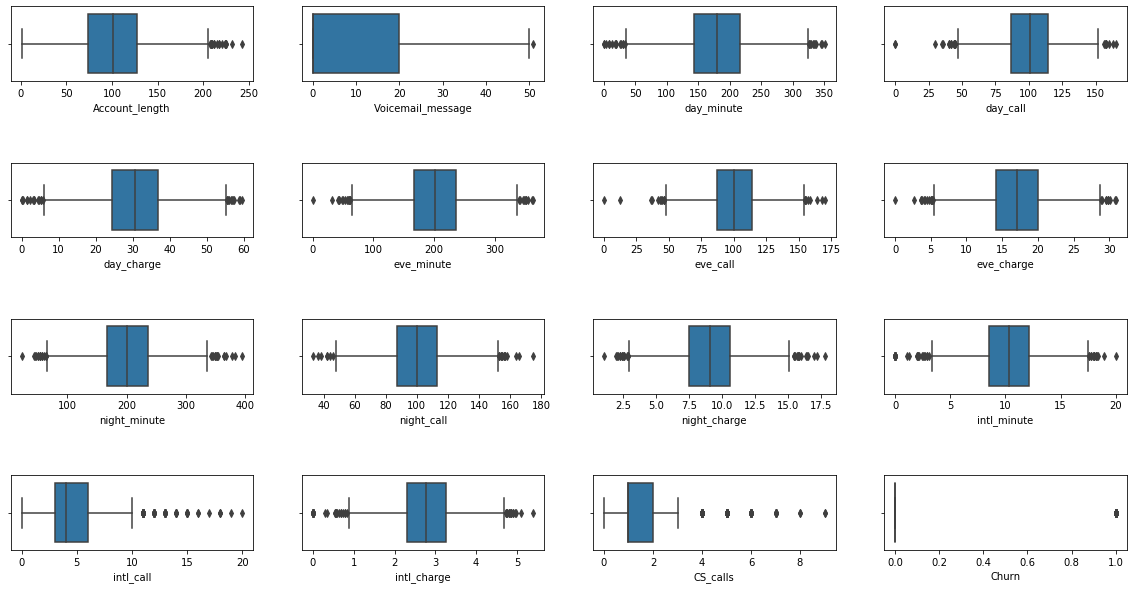

In [45]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=1.1)
for i in range(len(num)):
    plt.subplot(4,4,i+1)
    sb.boxplot(full[f'{num[i]}'])

### View categorical data patterns

### Area code 408

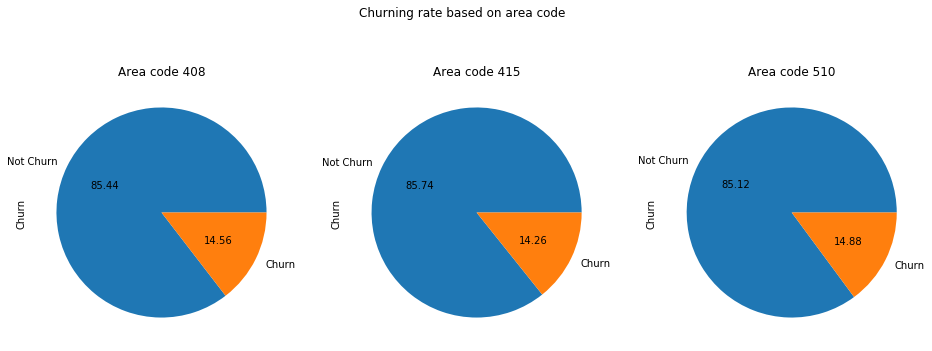

In [46]:
plt.figure(figsize=(16,6))
plt.suptitle('Churning rate based on area code')
plt.subplot(131)
plt.title('Area code 408')
full[full['Area_code']==408]['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'])
plt.subplot(132)
plt.title('Area code 415')
full[full['Area_code']==415]['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'])
plt.subplot(133)
plt.title('Area code 510')
full[full['Area_code']==510]['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'])
plt.show()

Each area code has the same proprtion of churning and non churning customer, will not have much effect with prediction

In [47]:
train = train.drop(columns=['Area_code'])
test = test.drop(columns=['Area_code'])
full = full.drop(columns=['Area_code'])

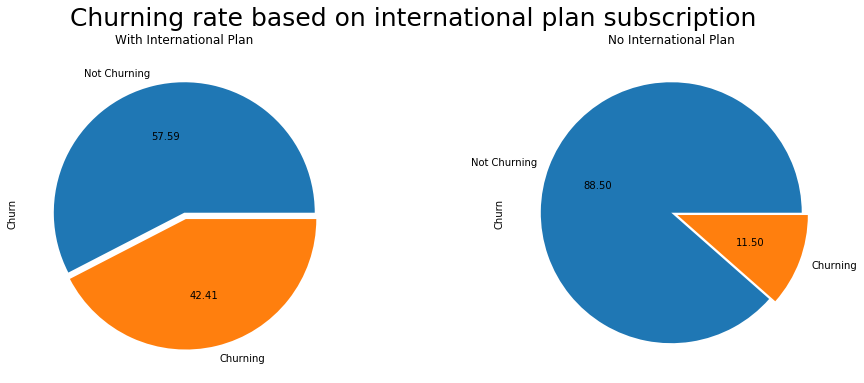

In [48]:
plt.figure(figsize=(16,6))
plt.suptitle('Churning rate based on international plan subscription',fontsize=25)
plt.subplot(121)
plt.title('With International Plan',fontsize=12)
full[full['Intl_plan']=='Yes']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(122)
plt.title('No International Plan',fontsize=12)
full[full['Intl_plan']=='No']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.show()

Having an international plan subscription affect customer churning greatly.

Assumption: provider's international plan might be overpriced or network issue (?)

### Visualize top telecom member

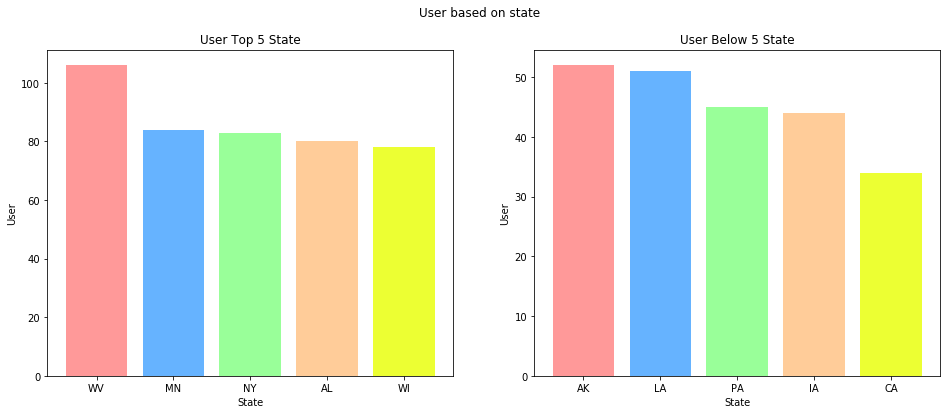

In [49]:
state_top = dict(full['State'].value_counts().head())
state_tail = dict(full['State'].value_counts().tail())

plt.figure(figsize=(16,6))
plt.suptitle('User based on state')
plt.subplot(121)
plt.title('User Top 5 State')
plt.bar(state_top.keys(),state_top.values(),color=colors)
plt.xlabel('State')
plt.ylabel('User')
plt.subplot(122)
plt.title('User Below 5 State')
plt.bar(state_tail.keys(),state_tail.values(),color=colors)
plt.xlabel('State')
plt.ylabel('User')
plt.show()

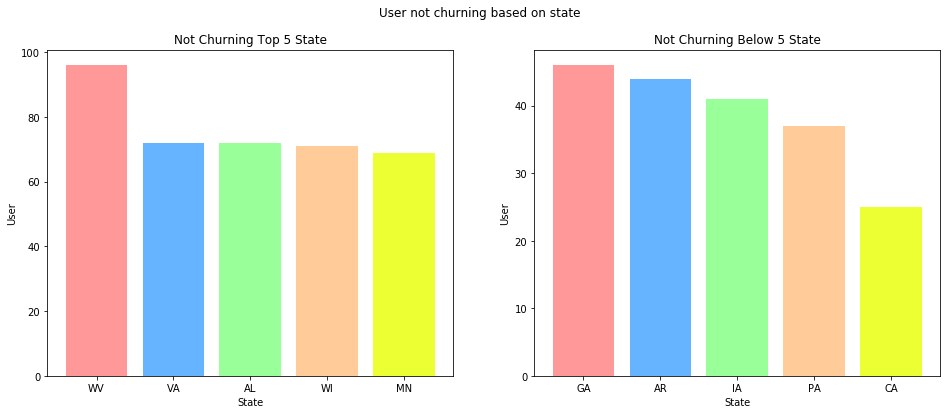

In [50]:
state_no_top = dict(full[full['Churn']==0]['State'].value_counts().head())
state_no_tail = dict(full[full['Churn']==0]['State'].value_counts().tail())
plt.figure(figsize=(16,6))
plt.suptitle('User not churning based on state')
plt.subplot(121)
plt.title('Not Churning Top 5 State')
plt.bar(state_no_top.keys(),state_no_top.values(),color=colors)
plt.xlabel('State')
plt.ylabel('User')
plt.subplot(122)
plt.title('Not Churning Below 5 State')
plt.bar(state_no_tail.keys(),state_no_tail.values(),color=colors)
plt.xlabel('State')
plt.ylabel('User')
plt.show()

##### West Virginia, Alabama, Wisconsin and Minnesota customer seemed to be loyal.

In top 5 in subscription and non churning number.

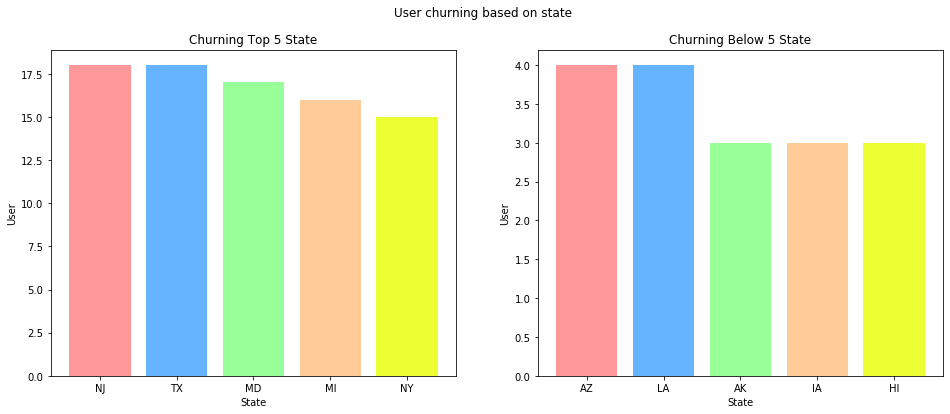

In [51]:
state_yes_top = dict(full[full['Churn']==1]['State'].value_counts().head())
state_yes_tail = dict(full[full['Churn']==1]['State'].value_counts().tail())
plt.figure(figsize=(16,6))
plt.suptitle('User churning based on state')
plt.subplot(121)
plt.title('Churning Top 5 State')
plt.bar(state_yes_top.keys(),state_yes_top.values(),color=colors)
plt.xlabel('State')
plt.ylabel('User')
plt.subplot(122)
plt.title('Churning Below 5 State')
plt.bar(state_yes_tail.keys(),state_yes_tail.values(),color=colors)
plt.xlabel('State')
plt.ylabel('User')
plt.show()

### Top 5 churning state

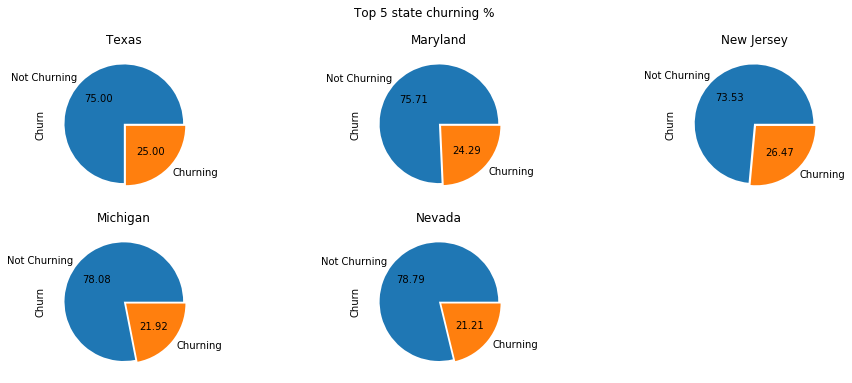

In [52]:
plt.figure(figsize=(16,6))
plt.suptitle('Top 5 state churning %')
plt.subplot(231)
plt.title('Texas')
full[full['State']=='TX']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(232)
plt.title('Maryland')
full[full['State']=='MD']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(233)
plt.title('New Jersey')
full[full['State']=='NJ']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(234)
plt.title('Michigan')
full[full['State']=='MI']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(235)
plt.title('Nevada')
full[full['State']=='NV']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.show()

Top 5 churning state has a high churn ratio in comparison with the average. 

Customer's location might affect churning rate (?)

### Average day charge per state

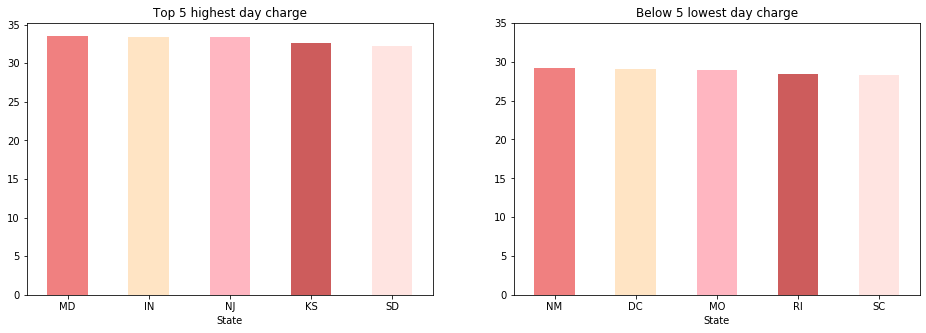

In [53]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Top 5 highest day charge')
full.groupby('State')['day_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,40,5))

plt.subplot(122)
plt.title('Below 5 lowest day charge')
full.groupby('State')['day_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,40,5))
plt.show()

### Maryland(MD) and New Jersey (NJ) is in top 5 in churning and highest day charge.

Higher day charge = higher churn?

### Average evening charge per state

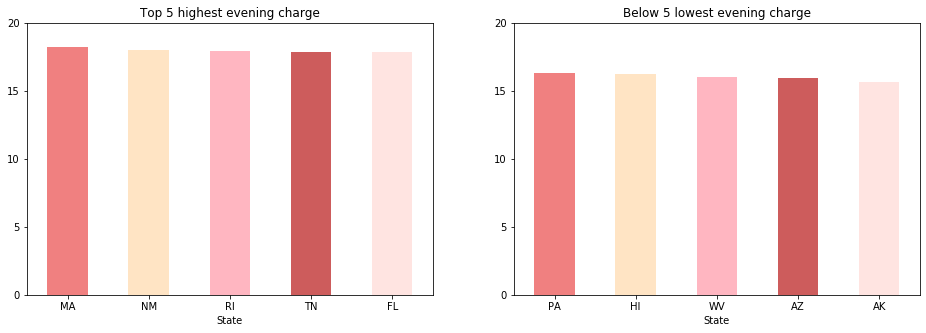

In [54]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Top 5 highest evening charge')
full.groupby('State')['eve_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,25,5))

plt.subplot(122)
plt.title('Below 5 lowest evening charge')
full.groupby('State')['eve_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,25,5))
plt.show()

### Average night charge per state

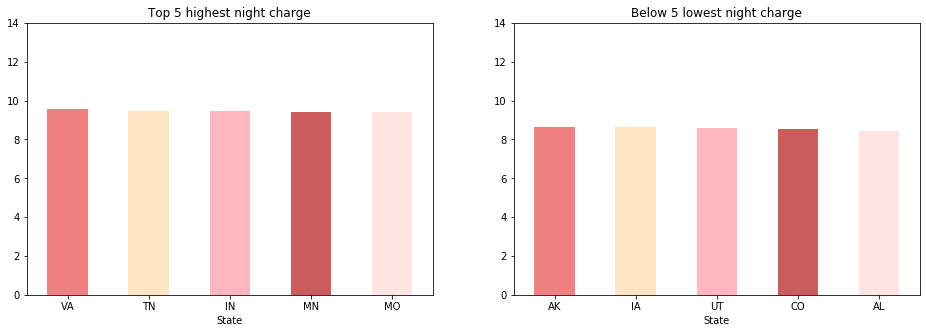

In [55]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Top 5 highest night charge')
full.groupby('State')['night_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15,2))

plt.subplot(122)
plt.title('Below 5 lowest night charge')
full.groupby('State')['night_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15,2))
plt.show()

### None of states in top 5 highest night and evening charge is in top 5 in churning.

Night & Evening charge != churn?

### Average international charge based on state

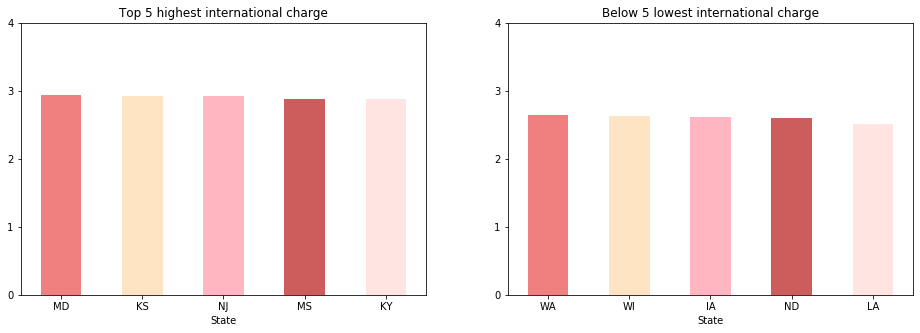

In [56]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Top 5 highest international charge')
full.groupby('State')['intl_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,5,1))

plt.subplot(122)
plt.title('Below 5 lowest international charge')
full.groupby('State')['intl_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=['lightcoral','bisque','lightpink','indianred','mistyrose'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0,5,1))
plt.show()

### Again, Maryland and New Jersey is in top 5 in highest international charge and top 5 churn.

Does international charge affected churning more?

In [57]:
full.describe()

,Account_length,Voicemail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,CS_calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### Check numerical feature data

#### Check numerical feature correlation with target

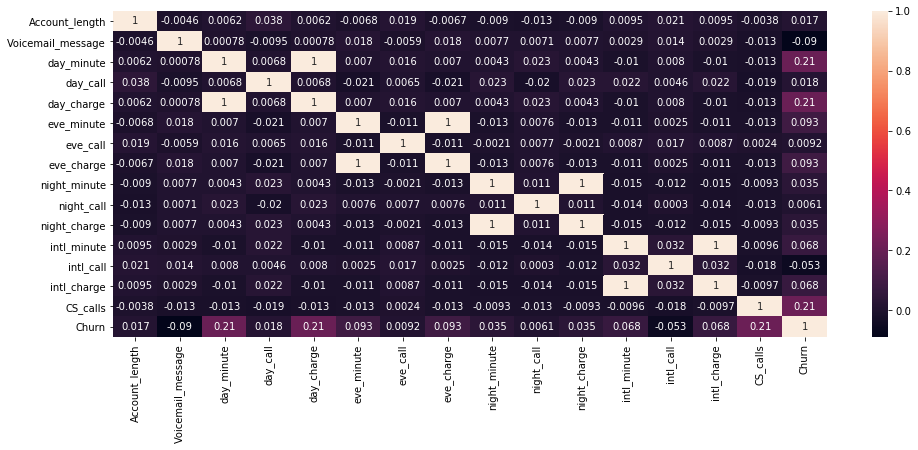

In [58]:
plt.figure(figsize=(16,6))
sb.heatmap(full[num].corr(),annot=True)
plt.show()

#### There are several features that are highly correlated with each other

- day_minute and day_charge -> 6am - 5pm
- eve_minute and eve_charge -> 5pm - 8pm
- night_minute and night_charge -> 8pm - 6am
- intl_minute and intl_charge

#### Highly correlated feature will be drop

Feature to be dropped:
- day_minute
- eve_minute
- night_minute
- intl_minute

Reasoning: consumer likely to stop subscription based on price charged, not by how much minute they use the service

In [59]:
train = train.drop(columns=['day_minute','eve_minute','night_minute','intl_minute'])
test = test.drop(columns=['day_minute','eve_minute','night_minute','intl_minute'])

In [60]:
full = full.drop(columns=['day_minute','eve_minute','night_minute','intl_minute'])

In [61]:
full.head()

,State,Account_length,Intl_plan,Voicemail_message,day_call,day_charge,eve_call,eve_charge,night_call,night_charge,intl_call,intl_charge,CS_calls,Churn
0,KS,128,No,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,No,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,No,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,Yes,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,Yes,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [62]:
newnum = [i for i in full.columns if i not in cat]
newcat = ['State','Intl_plan']

#### Heatmap after dropping highly correlated features

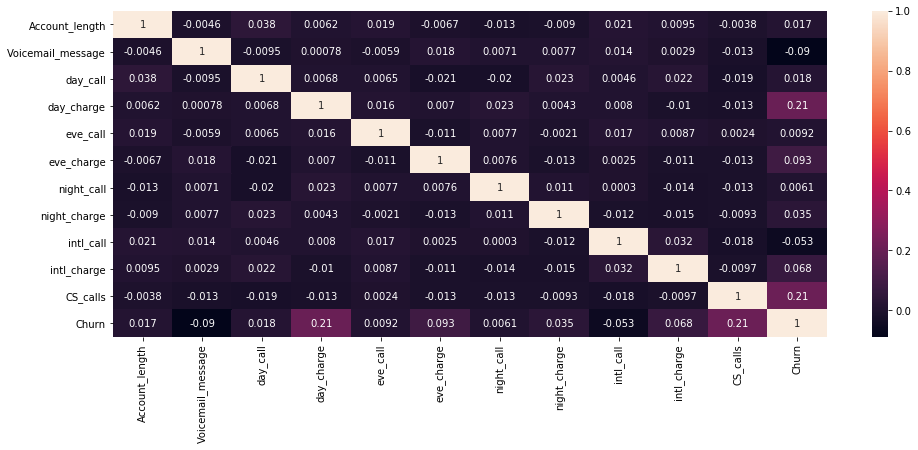

In [63]:
plt.figure(figsize=(16,6))
sb.heatmap(full[newnum].corr(),annot=True)
plt.show()

#### Visualize highest correlated feature with target

##### Day charge

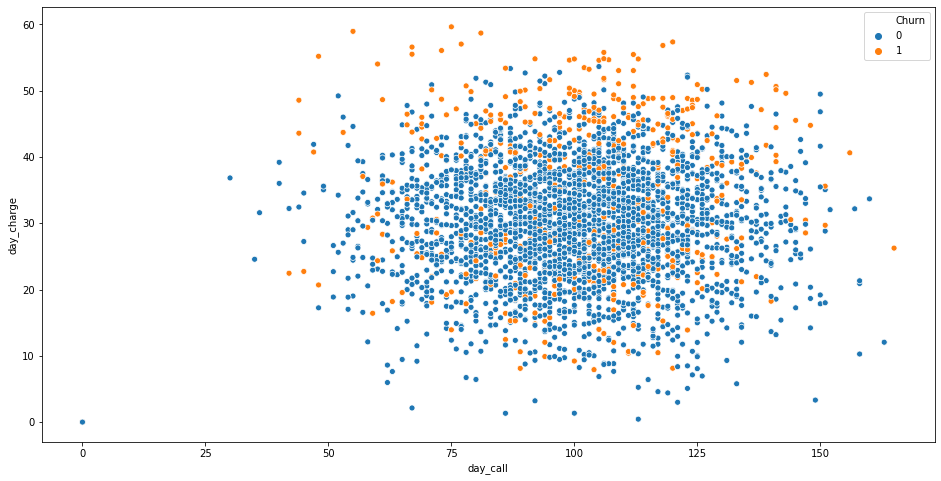

In [64]:
plt.figure(figsize=(16,8))
sb.scatterplot(x='day_call',y='day_charge',hue='Churn',data=full)
plt.show()

#### On average, customers who churn charged more on day calls although they spend the same amount of calls as those who not churn.

Possible churning because of overcharging?

#### See customer service call made effect on churning

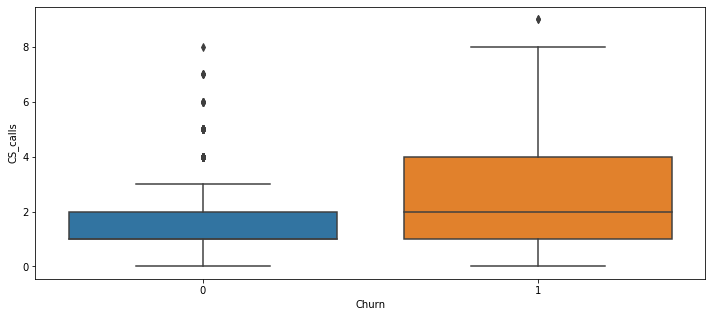

In [68]:
plt.figure(figsize=(12,5))
sb.boxplot(x='Churn',y='CS_calls',data=full)
plt.show()

##### Customer with more customer service calls per month tend to churn

#### Create dummy variables for categorical feature

#### Dummy variable for state

In [69]:
state_dummy_train = pd.get_dummies(train['State'],prefix='state')
state_dummy_test = pd.get_dummies(test['State'],prefix='state')
state_dummy_full = pd.get_dummies(full['State'],prefix='state')

#### Dummy variable for international plan

In [70]:
intl_dummy_train = pd.get_dummies(train['Intl_plan'],prefix='intl')
intl_dummy_test = pd.get_dummies(test['Intl_plan'],prefix='intl')
intl_dummy_full = pd.get_dummies(full['Intl_plan'],prefix='intl')

### Concat dummies variable with other feature

In [71]:
new_train = pd.concat([state_dummy_train,intl_dummy_train,train[newnum]],axis=1)
new_train.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,day_call,day_charge,eve_call,eve_charge,night_call,night_charge,intl_call,intl_charge,CS_calls,Churn
0,0,0,0,0,0,0,0,0,0,0,...,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,0,0,0,0,0,0,0,0,0,0,...,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,0,0,0,0,0,0,0,0,0,0,...,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,0,0,0,0,0,0,0,0,0,0,...,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [72]:
new_test = pd.concat([state_dummy_test,intl_dummy_test,test[newnum]],axis=1)
new_test.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,day_call,day_charge,eve_call,eve_charge,night_call,night_charge,intl_call,intl_charge,CS_calls,Churn
0,0,0,0,0,0,0,0,0,0,0,...,97,31.37,80,29.89,90,9.71,4,2.35,1,0
1,0,0,0,0,0,0,0,0,0,0,...,137,21.95,83,19.42,111,9.40,6,3.43,4,1
2,0,0,0,0,0,0,0,0,0,0,...,67,56.59,97,27.01,128,7.23,9,1.46,4,1
3,0,0,0,0,0,0,0,0,0,0,...,103,18.77,102,11.67,105,8.53,6,2.08,2,0
4,0,0,0,0,0,0,0,0,0,0,...,117,20.28,109,18.28,90,8.04,1,3.00,1,0


### Concat data for full dataset

In [73]:
new_full = pd.concat([state_dummy_full,intl_dummy_full,full[newnum]],axis=1)
new_full.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,day_call,day_charge,eve_call,eve_charge,night_call,night_charge,intl_call,intl_charge,CS_calls,Churn
0,0,0,0,0,0,0,0,0,0,0,...,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,0,0,0,0,0,0,0,0,0,0,...,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,0,0,0,0,0,0,0,0,0,0,...,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,0,0,0,0,0,0,0,0,0,0,...,113,28.34,122,12.61,121,8.41,3,2.73,3,0


### Export cleaned data to csv

In [50]:
new_train.to_csv('clean_train.csv',index=False)
new_test.to_csv('clean_test.csv',index=False)
new_full.to_csv('clean_full.csv',index=False)
full.to_csv('full.csv',index=False)